
<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Logistic Regresion Lab
## Exercise with bank marketing data

_Authors: Sam Stack(DC)_

## Introduction
- Data from the UCI Machine Learning Repository: data, [data dictionary](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- **Goal**: Predict whether a customer will purchase a bank product marketed over the phone
- `bank-additional.csv` is already in our repo, so there is no need to download the data from the UCI website

## Step 1: Read the data into Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sqrt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, log_loss

In [2]:
path = '../ds-project-14/data/bank.csv'
bank_df = pd.read_csv(path)
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


**  Target '`y`' represented as such**
    - No : 0
    - Yes : 1
    


In [3]:
# Perform what ever steps you need to familiarize yourself with the data:
#Look at columns
print(bank_df.head())
print(bank_df.columns)
print(bank_df.dtypes)
print(bank_df.describe())

   age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.e

In [4]:
bank_df['married']=np.where(bank_df['marital']=='married', 1,0)
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,married
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0,1
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0,1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0,1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0,1


In [5]:
bank_df['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64


## Step 2: Prepare at least three features
- Include both numeric and categorical features
- Choose features that you think might be related to the response (based on intuition or exploration)
- Think about how to handle missing values (encoded as "unknown")

In [6]:
# A:
features = ['age','job','education','campaign','previous','day_of_week','y']
y = bank_df['y']
X = bank_df[features]

In [32]:
#check quality of data
for feature in features:
    if feature != 'age':
        print("-" * 20)
        print(bank_df[feature].value_counts())

--------------------
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64
--------------------
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64
--------------------
1     1764
2     1039
3      549
4      291
5      142
6       99
7       60
8       36
9       32
10      20
11      19
12      16
17      14
13      11
16       7
14       6
15       2
22       2
19       2
23       2
29       2
27       1
18       1
24       1
35       1
Name: campaign, dtype: int64
--------------------
thu    860
mon    855
tue    841
wed    795
fri    768
Name: day_of_we

In [52]:
#drop unknowns
clean_df = bank_df[features]
print(clean_df.head())
print(clean_df.shape)

clean_df = clean_df.loc[clean_df["job"] != 'unknown']
print(clean_df.shape)

clean_df = clean_df.loc[clean_df["education"] != 'unknown']
print(clean_df.shape)

#check again
for feature in features:
    if feature != 'age':
        print("-" * 20)
        print(clean_df[feature].value_counts())

   age          job          education  campaign day_of_week  y
0   30  blue-collar           basic.9y         2         fri  0
1   39     services        high.school         4         fri  0
2   25     services        high.school         1         wed  0
3   38     services           basic.9y         3         fri  0
4   47       admin.  university.degree         1         mon  0
(4119, 6)
(4080, 6)
(3926, 6)
--------------------
admin.           988
blue-collar      842
technician       672
services         381
management       309
retired          161
self-employed    155
entrepreneur     141
unemployed       108
housemaid        107
student           62
Name: job, dtype: int64
--------------------
university.degree      1261
high.school             915
basic.9y                568
professional.course     533
basic.4y                421
basic.6y                227
illiterate                1
Name: education, dtype: int64
--------------------
1     1683
2      995
3      515
4      27


## Step 3: Model building
- Use cross-validation to evaluate the logistic regression model with your chosen features.  
    You can use any (combination) of the following metrics to evaluate.
    - [Classification/Accuracy Error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
    - [Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
    - [ROC curves and area under a curve (AUC)](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)
    - [Log loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)
- Try to increase the metrics by selecting different sets of features
    - *Bonus*: Experiment with hyper parameters such are regularization.

In [51]:
bank_md = pd.get_dummies(clean_df[['age','job','education','campaign','day_of_week','y']], drop_first = True)
print(bank_md.head())

   age  campaign  y  job_blue-collar  job_entrepreneur  job_housemaid  \
0   30         2  0                1                 0              0   
1   39         4  0                0                 0              0   
2   25         1  0                0                 0              0   
3   38         3  0                0                 0              0   
4   47         1  0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  ...  \
0               0            0                  0             0  ...   
1               0            0                  0             1  ...   
2               0            0                  0             1  ...   
3               0            0                  0             1  ...   
4               0            0                  0             0  ...   

   education_basic.6y  education_basic.9y  education_high.school  \
0                   0                   1                   

In [23]:
from sklearn.linear_model import LogisticRegression
mymodel = LogisticRegression(max_iter=500)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = .1, random_state=32)
from sklearn import metrics
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, log_loss
mymodel.fit(X_train, y_train)
mymodel.score(X_test, y_test)

0.8980582524271845

In [24]:
from sklearn.preprocessing import StandardScaler
# "Instantiate" the scaler (create an instance of the sklearn class)
std_scaler = StandardScaler()
std_scaler

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X1, y1, train_size=0.9, random_state=42)

lr = LogisticRegression(max_iter=500)
lr.fit(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)

0.8980582524271845

**Build a Model**  

In [53]:
# convert selected features do dummies

# set the model
mymodel = LogisticRegression(max_iter=500)
# set x and y
X1 = bank_md.drop('y', axis =1)
y1 = bank_md['y']
# train test splot
X_train, X_test, y_train, y_test = train_test_split(X1, y1,random_state=32)
# fit model
mymodel.fit(X_train, y_train)
mymodel.score(X_test, y_test)

0.895112016293279

**Get the Coefficient for each feature.**
- Be sure to make note of interesting findings.



In [54]:
name = bank_md.columns.drop('y')

coef = mymodel.coef_[0]

coef_df = pd.DataFrame([name,coef],index = ['Name','Coef']).transpose()
coef_df.set_index('Name', inplace=True)
coef_df

,Coef
Name,
age,0.019585
campaign,-0.153891
job_blue-collar,-0.447745
job_entrepreneur,-1.041217
job_housemaid,-0.395326
job_management,-0.489372
job_retired,0.386354
job_self-employed,-0.373827
job_services,-0.33999


In [ ]:
#job_entreprenuer is the largest coefficient, education_illiterate coefficient = 0

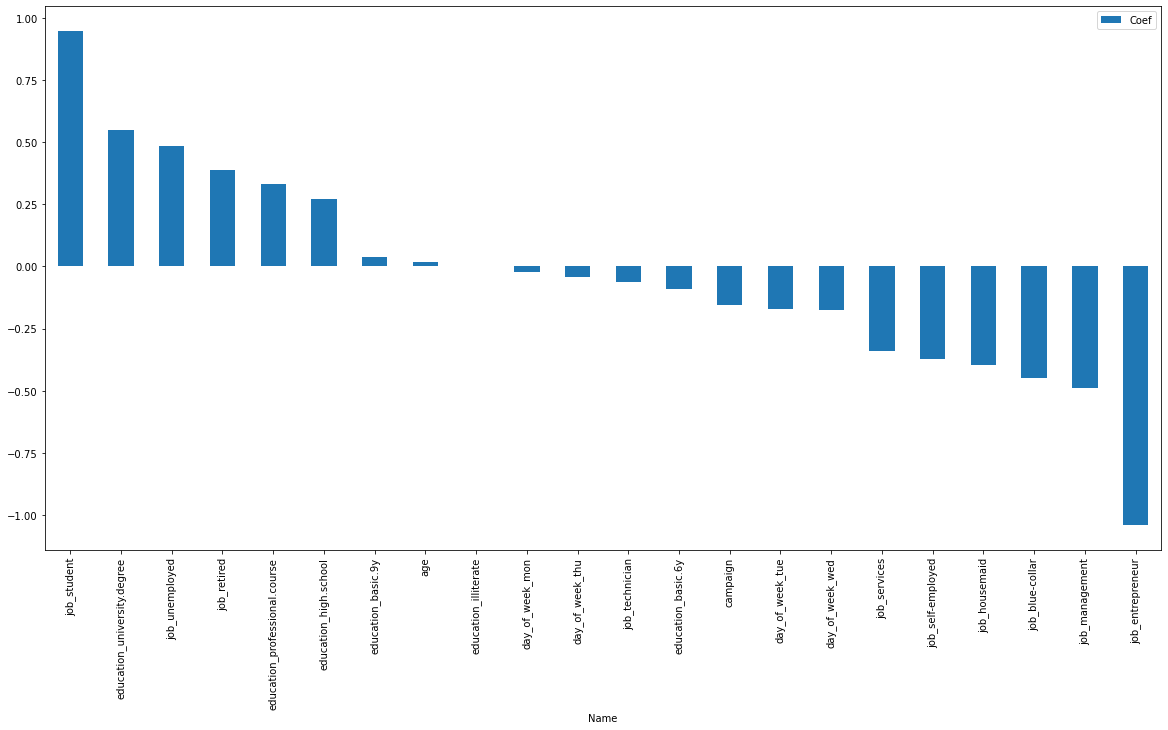

In [55]:
coef_df.sort_values('Coef', ascending = False).plot(kind='bar', figsize=(20,10));

**Use the Model to predict on x_test and evaluate the model using metric(s) of Choice.**

In [56]:
# A:
y_pred = mymodel.predict(X_test)

### Model 2: Use a different combination of features.
- Evaluate the model and interpret your choosen metrics.

In [57]:
# A: accuracy score
accuracy_score(y_test,y_pred)

0.895112016293279

In [103]:
#confusion matrix 
confusion_matrix(y_test,y_pred)

array([[879,   0],
       [103,   0]])

In [59]:
#ROC-AUC score
roc_auc_score(y_test,y_pred)

0.5

In [60]:
#log loss
log_loss(y_test,y_pred)

3.6227026157594713



### Is your model not performing very well?

Is it not predicting any True Positives?

Lets try one more thing before we revert to grabbing more features.  Adjusting the probability threshold.

Use the `LogisticRegression.predict_proba()` attribute to get the probabilities.

Recall from the lesson the first probability is the for `class 0` and the second is for `class 1`.

In [65]:
# A:
y_prob = mymodel.predict_proba(X_test)
y_prob

array([[0.87254691, 0.12745309],
       [0.86405169, 0.13594831],
       [0.85668714, 0.14331286],
       ...,
       [0.89724882, 0.10275118],
       [0.9530517 , 0.0469483 ],
       [0.95455085, 0.04544915]])

**Visualize the distribution**

(array([  6.,   7.,  12.,  26.,  65., 141., 206., 263., 219.,  37.]),
 array([0.65944077, 0.69333798, 0.7272352 , 0.76113241, 0.79502963,
        0.82892684, 0.86282406, 0.89672127, 0.93061849, 0.9645157 ,
        0.99841292]),
 <BarContainer object of 10 artists>)

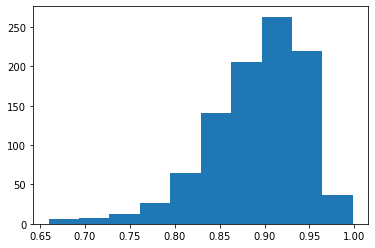

In [77]:
# A:
y_prob_t = y_prob.transpose()

plt.hist(y_prob_t[0])

(array([ 37., 219., 263., 206., 141.,  65.,  26.,  12.,   7.,   6.]),
 array([0.00158708, 0.0354843 , 0.06938151, 0.10327873, 0.13717594,
        0.17107316, 0.20497037, 0.23886759, 0.2727648 , 0.30666202,
        0.34055923]),
 <BarContainer object of 10 artists>)

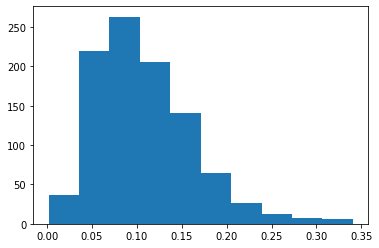

In [80]:
plt.hist(y_prob_t[1])

** Calculate a new threshold and use it to convert predicted probabilities to output classes**



In [91]:
# A:
y_pred2=[]
for prob in y_prob_t[1]:
    if prob > .30:
        y_pred2.append(1)
    else:
        y_pred2.append(0)
        
print(len(y_pred2))
print(len(y_test))

982
982


**Evaluate the model metrics now**

In [96]:
print("Accuracy: ",accuracy_score(y_test,y_pred2))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred2))
print("ROC-AUC: ",roc_auc_score(y_test,y_pred2))
print("Log loss: ",log_loss(y_test,y_pred))

Accuracy:  0.8910386965376782
Confusion Matrix:  [[874   5]
 [102   1]]
ROC-AUC:  0.5020102278626418
Log loss:  3.6227026157594713


In [ ]:
#Accuracy score got lower? Didn't seem to improve my model

## Step 4: Build a model using all of the features.

- Evaluate it using your prefered metrics.

In [97]:
# A: 
bank_all = pd.get_dummies(bank_df, drop_first = True)
mymodel1 = LogisticRegression()

X2 = bank_all.drop('y', axis =1)
y2 = bank_all['y']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, random_state =32)

mymodel1.fit(X_train2, y_train2)
mymodel1.score(X_test2, y_test2)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9116504854368932

In [99]:
y_pred2 =mymodel1.predict(X_test2)
#accuracy
accuracy_score(y_test2,y_pred2)

0.9116504854368932

In [100]:
#confusion matrix
confusion_matrix(y_test2,y_pred2)

array([[892,  24],
       [ 67,  47]])

In [101]:
#ROC-AUC score
roc_auc_score(y_test2,y_pred2)

0.6930399141959702

In [102]:
#log loss
log_loss(y_test2,y_pred2)

3.051502759490483